In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 기초 지표 구해보기
* 1) 기간 별 수익률(일별)
* 2) 이동평균선(5, 10, 20, 60)

In [8]:
# 1) 기간 별 수익륙(일별) 구하기

# 저장된 데이터 불러오기
df=pd.read_csv('KOSPI200_close.csv').set_index('Date')

# Code, Name 불러오기
df_port_info=pd.read_csv('codenamelist.csv',encoding='cp949',dtype=str)
del df_port_info['Unnamed: 0']

df_port_info

,Code,Name
0,005930,삼성전자
1,000660,SK하이닉스
2,005380,현대차
3,068270,셀트리온
4,051910,LG화학
5,012330,현대모비스
6,055550,신한지주
7,017670,SK텔레콤
8,005490,POSCO
9,051900,LG생활건강


In [12]:

# Pandas의 장점 : Loop문을 이용할 수도 있지만, 아래와 같이 간단하게 구현 가능
temp_df = df.copy()
temp_diff = temp_df / temp_df.shift(1)  #일별 수익률
temp_diff

,005930,000660,005380,068270,051910,012330,055550,017670,005490,051900,...,001520,034120,060980,096760,003920,014830,002960,079430,003300,036580
Date,,,,,,,,,,,,,,,,,,,,,
2018.05.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018.05.17,0.990973,0.996552,0.993355,0.996276,1.010234,1.002110,0.995868,1.004525,0.991736,0.986014,...,1.061466,0.998058,0.998054,0.988957,0.995549,1.038194,1.001497,1.012848,1.018018,1.003953
2018.05.18,1.002024,1.013841,1.003344,1.009346,0.995658,1.006316,0.990664,1.004505,1.001389,0.999212,...,1.002227,0.994163,1.007797,1.016129,1.013413,1.006689,1.000000,1.008457,0.958702,1.019685
2018.05.21,1.010101,1.013652,0.993333,1.000000,0.984012,1.010460,1.004188,0.997758,1.001387,0.996845,...,0.977778,0.998043,0.986460,1.014652,1.010294,1.001661,1.001495,0.995807,1.012308,0.976834
2018.05.23,1.036000,1.069585,0.969799,0.953704,1.014771,1.022774,0.980188,1.008989,0.976454,0.985759,...,0.986364,1.000000,0.958824,0.979543,0.983988,0.978441,1.000000,0.981053,0.984802,0.984190
2018.05.24,0.992278,0.992655,0.968858,1.027184,1.004367,0.967611,1.001064,0.997773,1.012766,1.051364,...,0.970046,0.988235,0.986708,0.998771,1.000000,0.979661,0.995522,0.997854,1.000000,0.995984
2018.05.25,1.025292,1.006342,0.992857,1.039698,1.021739,0.981172,0.985122,1.015625,0.969188,1.007634,...,0.947743,0.964286,0.988601,1.002460,0.997041,0.970588,1.005997,0.978495,0.959877,1.024194
2018.05.28,0.992410,0.992647,0.996403,0.985455,0.998582,0.987207,1.000000,1.000000,1.023121,1.006061,...,1.140351,1.006173,1.011530,0.998773,0.998516,1.014260,0.998510,0.973626,1.295820,1.051181
2018.05.29,0.980880,1.003175,1.010830,0.998155,0.975852,0.974082,0.997843,1.000000,0.985876,1.006777,...,0.956044,0.993865,0.978238,0.997543,0.986627,0.996485,1.000000,1.011287,0.868486,1.007491


In [13]:
df_port_info['avgdaily']=[(x-1)*100 for x in temp_diff.iloc[1:120].mean().tolist()] #average daily profit from -12month to -6month
df_port_info['stddaily']=[x*100 for x in temp_diff.iloc[1:120].std().tolist()]      #standard deviation
df_port_info

,Code,Name,avgdaily,stddaily
0,005930,삼성전자,-0.069509,1.602982
1,000660,SK하이닉스,-0.103417,2.328975
2,005380,현대차,-0.312152,1.686425
3,068270,셀트리온,-0.194774,2.954318
4,051910,LG화학,0.007473,2.411843
5,012330,현대모비스,-0.186260,1.856896
6,055550,신한지주,-0.080317,1.505110
7,017670,SK텔레콤,0.170888,1.545337
8,005490,POSCO,-0.264201,2.116141
9,051900,LG생활건강,-0.100873,2.679572


In [5]:
# Pandas의 장점 : Loop문을 이용할 수도 있지만, 아래와 같이 간단하게 구현 가능
df_MA5 = df.rolling(window=5).mean()
df_MA10 = df.rolling(window=10).mean()
df_MA5

,005930,000660,005380,068270,051910,012330,055550,017670,005490,051900,...,001520,034120,060980,096760,003920,014830,002960,079430,003300,036580
Date,,,,,,,,,,,,,,,,,,,,,
2018.05.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018.05.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018.05.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018.05.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018.05.23,50110.0,89200.0,148700.0,266700.0,342700.0,240400.0,47860.0,222600.0,359400.0,1266800.0,...,2196.0,25600.0,50860.0,8170.0,677600.0,59380.0,334600.0,23580.0,165000.0,12680.0
2018.05.24,50420.0,90720.0,146600.0,265900.0,343300.0,240800.0,47590.0,223200.0,358200.0,1271400.0,...,2194.0,25490.0,50230.0,8166.0,678000.0,59420.0,334500.0,23560.0,164100.0,12630.0
2018.05.25,51080.0,92420.0,144500.0,267400.0,344700.0,240200.0,47220.0,224300.0,355400.0,1281600.0,...,2144.0,25210.0,49510.0,8184.0,678600.0,58680.0,334700.0,23380.0,161300.0,12630.0
2018.05.28,51640.0,93740.0,142200.0,267600.0,346300.0,238700.0,46940.0,225200.0,354100.0,1293600.0,...,2149.0,24990.0,48820.0,8174.0,677200.0,58020.0,334800.0,23040.0,169100.0,12710.0
2018.05.29,51900.0,94880.0,140400.0,267700.0,347300.0,235500.0,46600.0,226200.0,351700.0,1308200.0,...,2144.0,24750.0,48060.0,8136.0,672600.0,57300.0,334800.0,22770.0,171200.0,12870.0


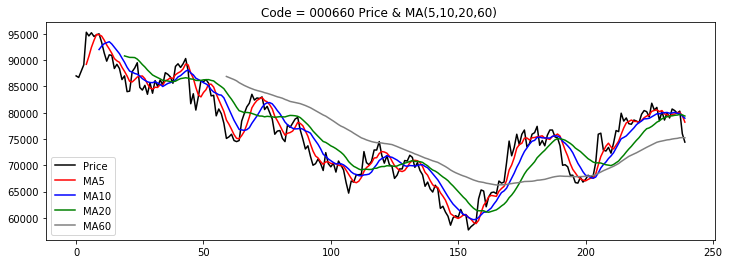

In [6]:
#df_MA10 = df.rolling(window=10).mean()
df_MA20 = df.rolling(window=20).mean()
df_MA60 = df.rolling(window=60).mean()

plt.figure(figsize=(12,4))

target='000660'
plt.title('Code = '+target+' Price & MA(5,10,20,60) ')
plt.plot(list(df.loc[:,'000660']),c='k')
plt.plot(list(df_MA5.loc[:,'000660']),c='r')
plt.plot(list(df_MA10.loc[:,'000660']),c='b')
plt.plot(list(df_MA20.loc[:,'000660']),c='g')
plt.plot(list(df_MA60.loc[:,'000660']),c='gray')
plt.legend(['Price','MA5','MA10','MA20','MA60'])